In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
import torch
import re
from sklearn.metrics import balanced_accuracy_score, roc_auc_score,accuracy_score,precision_recall_fscore_support
from Constants import *
from Misc import *
from Utils import *
from Preprocessing import DTDataset
tempfile = '../resources/outcomeDSMTemp.pt'
main_file = '../resources/outcomeDSM.pt'

In [2]:
get_tt_split()

([5,
  6,
  8,
  11,
  13,
  14,
  15,
  16,
  17,
  18,
  21,
  23,
  24,
  26,
  27,
  28,
  32,
  33,
  37,
  38,
  39,
  40,
  41,
  42,
  48,
  49,
  50,
  51,
  53,
  55,
  56,
  57,
  60,
  64,
  65,
  67,
  69,
  71,
  74,
  75,
  78,
  79,
  80,
  81,
  82,
  87,
  88,
  91,
  94,
  96,
  99,
  103,
  109,
  116,
  119,
  120,
  121,
  125,
  148,
  150,
  153,
  178,
  181,
  183,
  185,
  186,
  188,
  191,
  192,
  193,
  196,
  197,
  198,
  200,
  201,
  203,
  204,
  205,
  206,
  207,
  210,
  212,
  213,
  214,
  216,
  218,
  219,
  220,
  221,
  222,
  223,
  225,
  226,
  229,
  230,
  231,
  232,
  233,
  234,
  235,
  237,
  238,
  239,
  240,
  241,
  243,
  244,
  246,
  247,
  248,
  249,
  251,
  252,
  253,
  255,
  256,
  257,
  258,
  259,
  260,
  261,
  262,
  263,
  265,
  266,
  269,
  270,
  273,
  275,
  276,
  277,
  278,
  280,
  281,
  282,
  283,
  285,
  289,
  2000,
  2002,
  2003,
  2004,
  2007,
  2008,
  2009,
  2010,
  2011,
  2012,
  2013,


In [3]:
data = DTDataset(use_smote=False)
data.processed_df[Const.timeseries_outcomes]

,OS (Calculated),Locoregional control (Time),FDM (months),time_to_event
id,,,,
3,6.033333,4.700000,6.033333,4.700000
5,7.333333,7.333333,7.333333,6.000000
6,7.466667,7.466667,7.466667,6.000000
7,7.800000,7.800000,7.800000,6.000000
8,8.066667,8.066667,8.066667,8.066667
...,...,...,...,...
10201,143.200000,143.200000,143.200000,143.200000
10202,144.366667,144.366667,144.366667,6.000000
10203,148.366667,148.366667,136.033333,136.033333


In [4]:
from DeepSurvivalModels import *
format_tte_outcomes(data,Const.timeseries_outcomes)[0][2].sum()

tensor(57)

In [5]:
xtr,xtst,ytr,ytst = transition_sample(3,data)
xtr.shape

torch.Size([389, 78])

In [6]:
from DeepSurvivalModels import *
test = DSM(xtr.shape[1],dist="Weibull")
test.fit_normalizer(xtr)
test = test.time_to_event(xtr)
test['predictions'][0].shape, test['5%'][0].shape, len(test['predictions']),len(test['5%'])

lmeans tensor([[ 0.0603,  0.4429, -0.1133],
        [-0.2573, -0.6962, -0.4994],
        [ 0.0754,  0.3149,  0.1531],
        ...,
        [ 1.1097,  0.2205,  0.3823],
        [-0.1017,  0.5676,  0.0561],
        [ 0.5617,  0.0977, -0.3049]], grad_fn=<StackBackward0>) logits tensor([[0.3333, 0.3334, 0.3333],
        [0.3333, 0.3334, 0.3333],
        [0.3334, 0.3332, 0.3334],
        ...,
        [0.3334, 0.3332, 0.3334],
        [0.3334, 0.3334, 0.3332],
        [0.3333, 0.3334, 0.3333]], grad_fn=<ExpBackward0>)
lmeans tensor([[ 0.0522,  0.3401,  0.7774],
        [ 0.8540, -0.3968,  2.7083],
        [ 0.1284, -0.1635,  0.2773],
        ...,
        [-0.1243, -0.3538, -0.3115],
        [ 1.9447, -0.4923,  0.4117],
        [ 0.7046, -0.1826, -0.0042]], grad_fn=<StackBackward0>) logits tensor([[0.3334, 0.3333, 0.3333],
        [0.3334, 0.3333, 0.3332],
        [0.3333, 0.3333, 0.3334],
        ...,
        [0.3333, 0.3332, 0.3335],
        [0.3333, 0.3334, 0.3333],
        [0.3333, 0.3333

(torch.Size([389]), torch.Size([389]), 4, 4)

In [7]:
for i,ii,iii in zip(test['predictions'][0],test['5%'][0],test['95%'][0]):
    print(ii.item(),i.item(),iii.item())

1.0440161228179932 1.1707831621170044 1.4581363201141357
0.7875288128852844 0.6261723637580872 1.7236759662628174
1.1154707670211792 1.2046012878417969 2.187232255935669
0.9305673241615295 1.484771490097046 1.339158535003662
1.098039150238037 2.0278093814849854 1.9084184169769287
1.0963190793991089 1.4054957628250122 1.739304780960083
0.9789744019508362 1.0070879459381104 1.328627586364746
1.2010060548782349 1.0823378562927246 3.7194290161132812
1.1641632318496704 1.1963461637496948 2.0836737155914307
1.1479320526123047 1.593373417854309 2.597011089324951
1.4318679571151733 2.2696897983551025 9.379027366638184
0.9556322693824768 1.4018471240997314 1.5008926391601562
1.2324345111846924 2.8814547061920166 1.8124760389328003
0.9580456018447876 1.1009821891784668 1.764572024345398
0.9178669452667236 0.9095513224601746 1.6047309637069702
1.2067211866378784 1.4442397356033325 1.724475622177124
1.0295664072036743 1.0298131704330444 2.4159939289093018
1.1537197828292847 0.9303300976753235 2.29

In [8]:
# test, loss, metrics = train_dsm(data,k=10,dist="Weibull")
# test.time_to_event(xtr)

In [9]:
test2, loss2, metrics2 = train_dsm(data,k=6,dist="LogNormal",layers=[100],elbo=False,activation='Tanh',input_dropout=.1)
# test2.time_to_event(xtr)

best pretrain loss 8157.940177520235 epochs 1259


/data/DigitalTwinVis/python/DeepSurvivalModels.py:487: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at /opt/pytorch/pytorch/aten/src/ATen/native/TensorShape.cpp:3576.)
  survival = [torch.exp(c).T for c in cdf]


val loss 0.7745277300857765
val metrics {'OS (Calculated)': {12: {'roc_score': 0.5244755244755245, 'f1': 0.9862068965517241, 'matthews': 0.0}, 24: {'roc_score': 0.6430481283422459, 'f1': 0.9611307420494699, 'matthews': 0.0}, 36: {'roc_score': 0.6417910447761194, 'f1': 0.9537366548042704, 'matthews': 0.0}, 48: {'roc_score': 0.607824427480916, 'f1': 0.9424460431654677, 'matthews': 0.0}}, 'Locoregional control (Time)': {12: {'roc_score': 0.7041366906474821, 'f1': 0.9720279720279721, 'matthews': 0.0}, 24: {'roc_score': 0.6307251908396946, 'f1': 0.9424460431654677, 'matthews': 0.0}, 36: {'roc_score': 0.6, 'f1': 0.927007299270073, 'matthews': 0.0}, 48: {'roc_score': 0.5932678821879384, 'f1': 0.915129151291513, 'matthews': 0.0}}, 'FDM (months)': {12: {'roc_score': 0.4101654846335697, 'f1': 0.9791666666666666, 'matthews': 0.0}, 24: {'roc_score': 0.6257175660160734, 'f1': 0.9537366548042704, 'matthews': 0.0}, 36: {'roc_score': 0.607665805340224, 'f1': 0.9347826086956522, 'matthews': 0.0}, 48: {

val loss 0.8239082842366026
val metrics {'OS (Calculated)': {12: {'roc_score': 0.4230769230769231, 'f1': 0.9862068965517241, 'matthews': 0.0}, 24: {'roc_score': 0.5160427807486632, 'f1': 0.9611307420494699, 'matthews': 0.0}, 36: {'roc_score': 0.534443168771527, 'f1': 0.9537366548042704, 'matthews': 0.0}, 48: {'roc_score': 0.583969465648855, 'f1': 0.9424460431654677, 'matthews': 0.0}}, 'Locoregional control (Time)': {12: {'roc_score': 0.5422661870503598, 'f1': 0.9720279720279721, 'matthews': 0.0}, 24: {'roc_score': 0.4689885496183206, 'f1': 0.9424460431654677, 'matthews': 0.0}, 36: {'roc_score': 0.47559055118110233, 'f1': 0.927007299270073, 'matthews': 0.0}, 48: {'roc_score': 0.49579242636746146, 'f1': 0.915129151291513, 'matthews': 0.0}}, 'FDM (months)': {12: {'roc_score': 0.42671394799054374, 'f1': 0.9791666666666666, 'matthews': 0.0}, 24: {'roc_score': 0.5132032146957519, 'f1': 0.9537366548042704, 'matthews': 0.0}, 36: {'roc_score': 0.5917312661498708, 'f1': 0.9347826086956522, 'matt

val loss 0.8582458414035545
val metrics {'OS (Calculated)': {12: {'roc_score': 0.4423076923076923, 'f1': 0.9862068965517241, 'matthews': 0.0}, 24: {'roc_score': 0.49398395721925137, 'f1': 0.9611307420494699, 'matthews': 0.0}, 36: {'roc_score': 0.5177956371986223, 'f1': 0.9537366548042704, 'matthews': 0.0}, 48: {'roc_score': 0.5520038167938931, 'f1': 0.9424460431654677, 'matthews': 0.0}}, 'Locoregional control (Time)': {12: {'roc_score': 0.5755395683453237, 'f1': 0.9720279720279721, 'matthews': 0.0}, 24: {'roc_score': 0.4594465648854962, 'f1': 0.9424460431654677, 'matthews': 0.0}, 36: {'roc_score': 0.46377952755905516, 'f1': 0.927007299270073, 'matthews': 0.0}, 48: {'roc_score': 0.4603786816269284, 'f1': 0.915129151291513, 'matthews': 0.0}}, 'FDM (months)': {12: {'roc_score': 0.45744680851063835, 'f1': 0.9791666666666666, 'matthews': 0.0}, 24: {'roc_score': 0.5011481056257175, 'f1': 0.9537366548042704, 'matthews': 0.0}, 36: {'roc_score': 0.5706287683031869, 'f1': 0.9347826086956522, 'ma

In [14]:
torch.save(test2,main_file)

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
def result_df(metrics):
    result_df = []
    for outcome, outcomeresults in metrics.items():
        for months,scores in outcomeresults.items():
            for metric, score in scores.items():
                entry = {
                    'outcome': outcome,
                    'months': months,
                    'metric': metric,
                    'value': score
                }
                result_df.append(entry)
    return pd.DataFrame(result_df)
m2_df = result_df(metrics2)

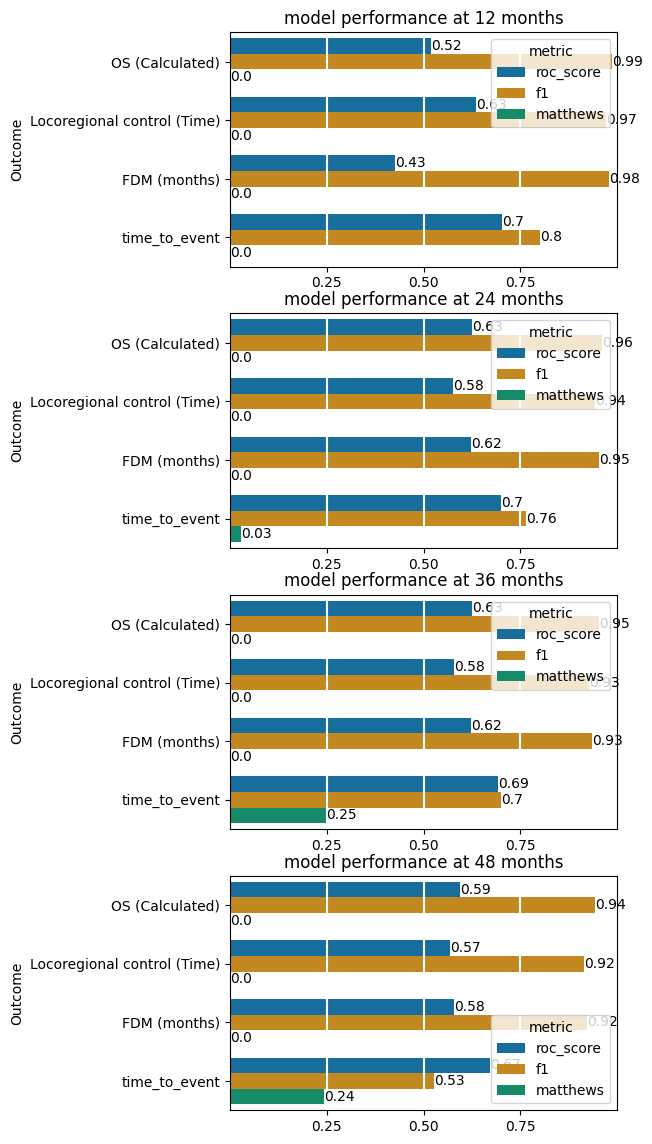

In [16]:
def plot_timeseries_outcomes_alt(df):
    months = df.months.unique()
    fig,axes = plt.subplots(len(months),1,figsize=(5,14))
    for i,month in enumerate(sorted(months)):
        ax = axes[i]
        subdf = df[df.months == month]
        sns.barplot(
            data=subdf,
            hue='metric',
            y='outcome',
            x='value',
            orient='h',
            ax=ax,
            palette='colorblind',
        )
        ax.set_title('model performance at ' + str(month) + ' months')
        ax.set_ylabel('Outcome')
        ax.set_xlabel('')
        ax.axvline(.5,c='white')
        ax.axvline(.75,c='white')
        ax.axvline(.25,c="white")
        ax.set_xlim(0,1)
        ax.set_xticks([.25,.5,.75])
    #     ax.get_legend().remove()
        for container in ax.containers:
            for patch,value in zip(container.patches,container.datavalues):
                x,y = patch.xy
                x = x + patch._width
                y = y + (patch._height/2)
                value = np.round(value,2)
                ax.text(x,y,str(value),verticalalignment='center')
plot_timeseries_outcomes_alt(m2_df)

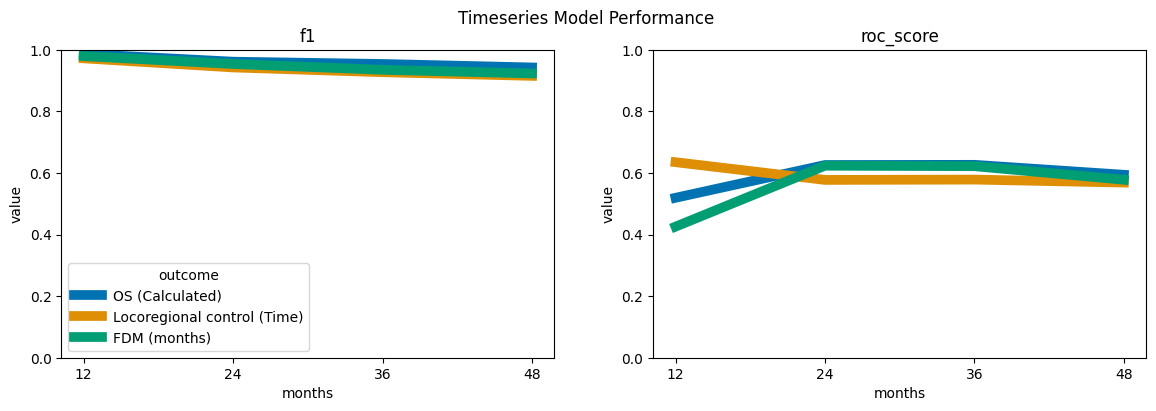

In [17]:
def plot_timeseries_outcomes(df):
    df = df.copy()
    df = df[df.outcome != 'time_to_event']
    metrics = df.metric.unique()
    metrics =[m for m in metrics if m != 'matthews']
    fig,axes = plt.subplots(1,len(metrics),figsize=(14,4))
    for i,metric in enumerate(sorted(metrics)):
        ax = axes[i]
        subdf = df[df.metric == metric]
        sns.lineplot(
            data=subdf,
            hue='outcome',
            y='value',
            x='months',
            ax=ax,
            palette='colorblind',
            linewidth=7,
            legend='brief' if i == 0 else False,
        )
        ax.set_title(metric)
        ax.set_xticks([12,24,36,48])
        ax.set_ylim(0,1)
    fig.suptitle('Timeseries Model Performance')

plot_timeseries_outcomes(m2_df)

In [ ]:
#model gridsearch
from DeepSurvivalModels import *
import pickle
layer_options = [
    [500]
    [100,100],
    [100],
    [500,500]
]
results = []
best_results = {'criteria': 0}
for layers in layer_options:
    for activation in ['Tanh','Sigmoid','ReLU6']:
        for dist in ['LogNormal']:
            for k in [3,6,9]:
                for elbo in [False,True]:
                    try:
                        args = {'k': k,'dist': dist,'layers':layers,'activation':activation,'elbo':elbo}
                        model, loss, metrics = train_dsm(data,dist=dist,k=k,layers=layers,activation=activation,elbo=elbo,verbose=1)
                        criteria = np.sum([v[12]['roc_score'] + v[48]['roc_score'] + v[48]['matthews'] for v in metrics.values()])
                        entry = {
                            'model': model,
                            'loss': loss,
                            'metrics': metrics,
                            'args': args,
                            'criteria': criteria
                        }
                        results.append(entry)
                        print('-----round' + str(len(results)) + '-------')
                        print(criteria,args)
                        if criteria > best_results['criteria']:
                            model.set_device('cpu')
                            torch.save(model,tempfile)
                            best_results = {k:v for k,v in entry.items()}
                            print('++++++++_______new best______++++++++1+++')
                            print(best_results['criteria'],best_results['args'])
                            print('++++++++++++++++')
                        print()
                    except Exception as e:
                        print('^^^^^^^^^^^^^^^^^^^')
                        print('error with args',args)
                        print(e)
                        print('^^^^^^^^^^^^^^^^^^^^^^^^^^')

In [ ]:
best_results

In [ ]:
plot_timeseries_outcomes(result_df(best_results['metrics']))

In [ ]:
torch.save(best_results['model'],main_file)

In [ ]:
from DeepSurvivalModels import *

bm= train_dsm(data,dist='Weibull',k=3,layers=[100],activation='Sigmoid',elbo=False)
bm[0].time_to_event(xtr,n_samples=1)[0]

In [ ]:
times = bm[0].time_to_event(xtr,n_samples=1)[0]
for i,time in enumerate(times):
    print(time.item(), bm[0](xtr,t=time.item())[0][0][i].item())
times

In [ ]:
import matplotlib.pyplot as plt
fig,axes = plt.subplots(2,2,figsize=(20,10))
i = 0
titles= Const.timeseries_outcomes
for row in range(axes.shape[0]):
    for col in range(axes.shape[1]):
        scurves = torch.stack(curves[i],axis=-1).detach().cpu().numpy()
        for ii in range(scurves.shape[0]):
            axes[row][col].plot(times,scurves[ii],color='black',alpha=.1,linewidth=2)
        axes[row][col].set_title(titles[i])
        axes[row][col].set_xlabel('Weeks')
        axes[row][col].set_ylabel('Survival %')
        i += 1